In [4]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [5]:
X=pd.read_csv('../train_x.csv')
Y=pd.read_csv('../train_y.csv')
Y=Y['target'].to_numpy()
#X.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:


x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=42)

In [7]:
g=Y[Y==1]
g.sum()/Y.size
g.size

2425

In [8]:

model = LGBMClassifier(learning_rate= 0.1,max_depth=4,min_child_samples=2)
model.fit(x_train, y_train)

LGBMClassifier(max_depth=4, min_child_samples=2)

In [9]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_samples': 2,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [10]:

y_prob_pos= model.predict_proba(x_train)
y_prob_pos=y_prob_pos[:,1]
y_pred=np.asarray([1 if x>0.5 else 0 for x in y_prob_pos])

In [11]:
y_prob_pos[5]

0.13750596195922973

In [12]:
y_pred.sum()

23

In [13]:
score=roc_auc_score(y_train,y_prob_pos)
print('AUC score is '+str(score))
print('Accuracy score is :'+str(accuracy_score(y_train,y_pred)))
print('precision  is :'+str(precision_score(y_train,y_pred)))
print('f1 score is :'+str(f1_score(y_train,y_pred)))
print('recall score is :'+str(recall_score(y_train,y_pred)))


AUC score is 0.7674242786111924
Accuracy score is :0.8728503618395456
precision  is :1.0
f1 score is :0.02738095238095238
recall score is :0.01388050694025347


In [14]:
y_prob_pos_test=model.predict_proba(x_test)
y_prob_pos_test=y_prob_pos_test[:,1]
score=roc_auc_score(y_test,y_prob_pos_test)
y_pred_test=np.asarray([1 if x>0.5 else 0 for x in y_prob_pos_test])
print('AUC score is '+str(score))
print('Accuracy score is :'+str(accuracy_score(y_test,y_pred_test)))
print('precision  is :'+str(precision_score(y_test,y_pred_test)))
print('f1 score is :'+str(f1_score(y_test,y_pred_test)))
print('recall score is :'+str(recall_score(y_test,y_pred_test)))

AUC score is 0.6628200268108299
Accuracy score is :0.8611111111111112
precision  is :1.0
f1 score is :0.007782101167315175
recall score is :0.00390625


In [15]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)


[[4740    0]
 [ 765    3]]


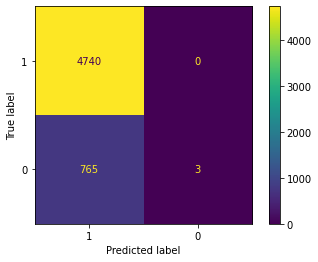

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()


In [17]:
fpr, tpr, threshold = roc_curve(y_train, y_prob_pos)


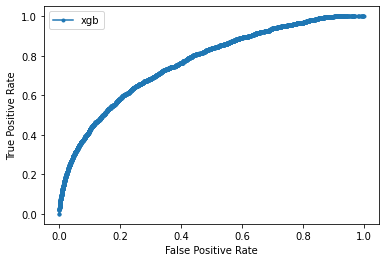

In [18]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, marker='.', label='xgb')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

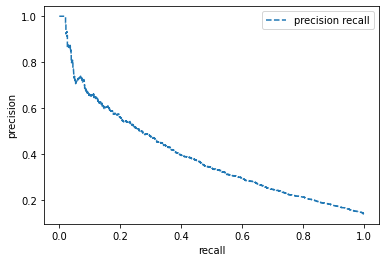

In [19]:
precision,recall,threshold=precision_recall_curve(y_train, y_prob_pos)
plt.plot(recall, precision, linestyle='--', label='precision recall')

# axis labels
plt.xlabel('recall')
plt.ylabel('precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [20]:
threshold=np.insert(threshold,0,0)


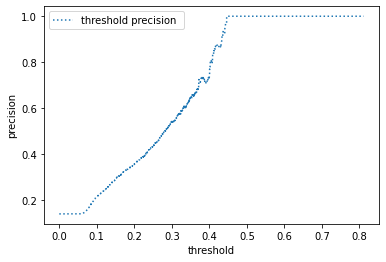

In [21]:
plt.plot(threshold, precision, linestyle='dotted', label='threshold precision ')

# axis labels
plt.xlabel('threshold')
plt.ylabel('precision')
# show the legend
plt.legend()
# show the plot
plt.show()



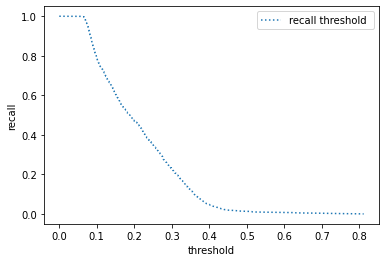

In [22]:
plt.plot(threshold, recall, linestyle='dotted', label='recall threshold ')

# axis labels
plt.xlabel('threshold')
plt.ylabel('recall')
# show the legend
plt.legend()
# show the plot
plt.show()

In [23]:
X_val=pd.read_csv('../test_x.csv')


In [24]:
y_prob_pos_test=model.predict(X_val)


In [25]:
y_val=pd.read_csv('../test_y.csv')

In [26]:
y_val['target']=y_prob_pos_test

In [27]:
y_val.to_csv('lxgb.csv',index=False)